In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Tijdreeks Visualisatie

### Datum: 21-05-2018

<h2 id="tocheading">Table of Contents</h2>
<div id="toc"></div>

## 0) Preprocessing voor visualisatie tijdreeks

#### Importeren packages en inladen dataset

In [2]:
### Importeren van packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
#package voor regular expression
import re

%matplotlib inline

#scherm instellingen
pd.options.display.max_rows = 100

In [3]:
os.getcwd()

'C:\\Users\\Andre\\Documents\\ITvitae\\Studie\\Data Science (Anchormen)\\Module B\\Projectopdracht\\project-rws\\code'

In [4]:
### Inladen van dataset
RWS_data_gefilterd_4params = pd.read_csv("../data/RWS_data_gefilterd_4params_pivot.csv", encoding="latin1", index_col=0)

In [5]:
RWS_data_gefilterd_4params.shape

(12173, 6)

In [6]:
RWS_data_gefilterd_4params.head(100)

locatie       datum  chlorofyl-a  nitriet  nitraat  orthofosfaat
0      ALMLO  2010-01-18         3.00   0.0200    1.690       0.01800
1      ALMLO  2010-02-15         3.00   0.0100    2.130       0.02200
2      ALMLO  2010-03-15         3.00   0.0300    1.970       0.04300
3      ALMLO  2010-04-12         6.00   0.0400    2.000       0.12000
4      ALMLO  2010-05-10         3.00   0.0400    1.690       0.22000
5      ALMLO  2010-06-07        12.00   0.0400    1.730       0.32000
6      ALMLO  2010-07-05        12.00   0.0100    1.430       0.02700
7      ALMLO  2010-08-02         5.00   0.0100    1.270       0.02600
8      ALMLO  2010-08-30         5.00   0.1000    2.510       0.22000
9      ALMLO  2010-09-27         2.00   0.0700    3.040       0.16000
10     ALMLO  2010-10-25         2.00   0.0200    2.950       0.14000
11     ALMLO  2010-11-22         2.00   0.0200    2.650       0.12000
12     ALMLO  2011-01-03         2.00   0.0100    3.310       0.10000
13     ALMLO  2011-01-17         2.00   0.0380    3.710       0.06280
14     ALMLO  2011-02-14         2.00   0.0420    3.800       0.06970
15     ALMLO  2011-03-14         2.42   0.0210    4.130       0.06330
16     ALMLO  2011-04-11         3.33   0.0100    3.950       0.04640
17     ALMLO  2011-05-09         2.00   0.0150    2.570       0.04000
18     ALMLO  2011-06-08        18.60   0.0100    1.660       0.00842
19     ALMLO  2011-07-04         6.07   0.0100    1.510       0.01740
20     ALMLO  2011-08-01         6.21   0.0100    1.150       0.02600
21     ALMLO  2011-08-29         3.92   0.0100    1.040       0.02770
22     ALMLO  2011-09-26         4.30   0.0100    0.808       0.02140
23     ALMLO  2011-10-24         7.39   0.0100    1.070       0.01530
24     ALMLO  2011-11-21         3.91   0.0100    2.690       0.05350
25     ALMLO  2011-12-21         2.00   0.0100    1.760       0.03540
26     ALMLO  2012-01-16         2.00   0.0580    3.220       0.07560
27     ALMLO  2012-02-13         2.00   0.0460    3.730       0.08110
28     ALMLO  2012-03-12         2.00   0.0160    3.840       0.06480
29     ALMLO  2012-04-10         2.80   0.0100    3.990       0.04700
30     ALMLO  2012-05-07         2.00   0.0100    4.160       0.03110
31     ALMLO  2012-06-04         5.40   0.0100    3.680       0.01130
32     ALMLO  2012-07-02        10.00   0.0100    2.550       0.00249
33     ALMLO  2012-07-30         8.70   0.0100    1.440       0.00100
34     ALMLO  2012-08-27         7.60   0.0100    1.700       0.07710
35     ALMLO  2012-09-24         2.60   0.0100    1.120       0.05160
36     ALMLO  2012-10-22         3.00   0.0100    1.240       0.03650
37     ALMLO  2012-11-19         2.00   0.0100    1.650       0.03600
38     ALMLO  2012-12-17         2.00   0.0100    1.520       0.04480
39     ALMLO  2013-01-14         2.00   0.0250    1.700       0.02790
40     ALMLO  2013-02-11         2.00   0.0190    1.820       0.03510
41     ALMLO  2013-03-11        11.00   0.0110    2.150       0.02420
42     ALMLO  2013-04-08        11.00   0.0260    2.370       0.00247
43     ALMLO  2013-05-06         2.10   0.0110    3.200       0.00304
44     ALMLO  2013-06-03         2.80   0.0100    3.580       0.00640
45     ALMLO  2013-07-01         7.70   0.0100    2.380       0.00211
46     ALMLO  2013-07-29        11.00   0.0100    1.330       0.01120
47     ALMLO  2013-08-26        12.00   0.0100    1.100       0.03730
48     ALMLO  2013-09-23         4.40   0.0100    1.180       0.03600
49     ALMLO  2013-10-21         2.00   0.0100    1.060       0.02420
50     ALMLO  2013-11-18         2.00   0.0100    1.170       0.02210
51     ALMLO  2013-12-16         2.00   0.0100    1.600       0.03140
52     ALMLO  2014-01-13         2.00   0.0120    1.820       0.03480
53     ALMLO  2014-02-10         2.00   0.0120    3.100       0.03610
54     ALMLO  2014-03-10         2.00   0.0170    3.300       0.02600
55     ALMLO  2014-04-07         3.70   0.0100    3.880       0.01670
56     ALMLO  2

#### Omzetten type van kolom datum van string naar timestamp

In [7]:
RWS_data_gefilterd_4params['datum'] = pd.DatetimeIndex(RWS_data_gefilterd_4params['datum'])

In [8]:
RWS_data_gefilterd_4params.datum[1]

Timestamp('2010-02-15 00:00:00')

#### Toevoegen kolom jaar

In [9]:
RWS_data_gefilterd_4params['jaar'] = pd.DatetimeIndex(RWS_data_gefilterd_4params['datum']).year

In [10]:
RWS_data_gefilterd_4params.datum[1].year

2010

In [11]:
RWS_data_gefilterd_4params.head()

locatie      datum  chlorofyl-a  nitriet  nitraat  orthofosfaat  jaar
0   ALMLO 2010-01-18          3.0     0.02     1.69         0.018  2010
1   ALMLO 2010-02-15          3.0     0.01     2.13         0.022  2010
2   ALMLO 2010-03-15          3.0     0.03     1.97         0.043  2010
3   ALMLO 2010-04-12          6.0     0.04     2.00         0.120  2010
4   ALMLO 2010-05-10          3.0     0.04     1.69         0.220  2010

#### Toevoegen kolom month

In [12]:
RWS_data_gefilterd_4params['month'] = pd.DatetimeIndex(RWS_data_gefilterd_4params['datum']).month

In [13]:
RWS_data_gefilterd_4params.datum[1].month

2

In [14]:
RWS_data_gefilterd_4params.head()

locatie      datum  chlorofyl-a  nitriet  nitraat  orthofosfaat  jaar  month
0   ALMLO 2010-01-18          3.0     0.02     1.69         0.018  2010      1
1   ALMLO 2010-02-15          3.0     0.01     2.13         0.022  2010      2
2   ALMLO 2010-03-15          3.0     0.03     1.97         0.043  2010      3
3   ALMLO 2010-04-12          6.0     0.04     2.00         0.120  2010      4
4   ALMLO 2010-05-10          3.0     0.04     1.69         0.220  2010      5

#### Omzetten van maand getal naar seizoen getal

In [15]:
# Season code
# 1 = winter
# 2 = lente
# 3 = zomer
# 4 = herfst

In [16]:
RWS_data_gefilterd_4params['seizoen_code'] = (RWS_data_gefilterd_4params['month']%12 + 3)//3

#### Omzetten van seizoen getal naar seizoen tekst

In [17]:
RWS_data_gefilterd_4params['seizoen'] = RWS_data_gefilterd_4params['seizoen_code'].map({1:'winter', 
                                                                                        2:'lente',
                                                                                        3:'zomer',
                                                                                        4:'herfst'})

In [18]:
pd.options.display.max_rows = 500

In [19]:
RWS_data_gefilterd_4params.head(5)

locatie      datum  chlorofyl-a  nitriet  nitraat  orthofosfaat  jaar  \
0   ALMLO 2010-01-18          3.0     0.02     1.69         0.018  2010   
1   ALMLO 2010-02-15          3.0     0.01     2.13         0.022  2010   
2   ALMLO 2010-03-15          3.0     0.03     1.97         0.043  2010   
3   ALMLO 2010-04-12          6.0     0.04     2.00         0.120  2010   
4   ALMLO 2010-05-10          3.0     0.04     1.69         0.220  2010   

   month  seizoen_code seizoen  
0      1             1  winter  
1      2             1  winter  
2      3             2   lente  
3      4             2   lente  
4      5             2   lente

In [20]:
#Verwijderen kolom seizoen_code
RWS_data_gefilterd_4params = RWS_data_gefilterd_4params.drop(['month','seizoen_code'], axis=1)

In [21]:
RWS_data_gefilterd_4params.head()

locatie      datum  chlorofyl-a  nitriet  nitraat  orthofosfaat  jaar  \
0   ALMLO 2010-01-18          3.0     0.02     1.69         0.018  2010   
1   ALMLO 2010-02-15          3.0     0.01     2.13         0.022  2010   
2   ALMLO 2010-03-15          3.0     0.03     1.97         0.043  2010   
3   ALMLO 2010-04-12          6.0     0.04     2.00         0.120  2010   
4   ALMLO 2010-05-10          3.0     0.04     1.69         0.220  2010   

  seizoen  
0  winter  
1  winter  
2   lente  
3   lente  
4   lente

## 1) Algemene correlatie

### 1.1) Preprocessing Algemene correlatie

In [22]:
algemene_correlatie = RWS_data_gefilterd_4params.groupby(['jaar','seizoen']).corr()

In [23]:
algemene_correlatie.columns

Index(['chlorofyl-a', 'nitraat', 'nitriet', 'orthofosfaat'], dtype='object')

In [24]:
algemene_correlatie

chlorofyl-a   nitraat   nitriet  orthofosfaat
jaar seizoen                                                            
2006 herfst  chlorofyl-a      1.000000 -0.180622 -0.079800     -0.128864
             nitraat         -0.180622  1.000000  0.549217      0.539487
             nitriet         -0.079800  0.549217  1.000000      0.597729
             orthofosfaat    -0.128864  0.539487  0.597729      1.000000
     lente   chlorofyl-a      1.000000 -0.011209 -0.054714     -0.161738
             nitraat         -0.011209  1.000000  0.542476      0.600614
             nitriet         -0.054714  0.542476  1.000000      0.765463
             orthofosfaat    -0.161738  0.600614  0.765463      1.000000
     winter  chlorofyl-a      1.000000 -0.087029 -0.063074     -0.141351
             nitraat         -0.087029  1.000000  0.288816      0.555023
             nitriet         -0.063074  0.288816  1.000000      0.712812
             orthofosfaat    -0.141351  0.555023  0.712812      1.000000
     zomer   chlorofyl-a      1.000000  0.076487  0.086422      0.067518
             nitraat          0.076487  1.000000  0.701021      0.683342
             nitriet          0.086422  0.701021  1.000000      0.737151
             orthofosfaat     0.067518  0.683342  0.737151      1.000000
2007 herfst  chlorofyl-a      1.000000 -0.200199 -0.116454     -0.177127
             nitraat         -0.200199  1.000000  0.586658      0.683967
             nitriet         -0.116454  0.586658  1.000000      0.756380
             orthofosfaat    -0.177127  0.683967  0.756380      1.000000
     lente   chlorofyl-a      1.000000 -0.086564 -0.089023     -0.196443
             nitraat         -0.086564  1.000000  0.474268      0.556950
             nitriet         -0.089023  0.474268  1.000000      0.667079
             orthofosfaat    -0.196443  0.556950  0.667079      1.000000
     winter  chlorofyl-a      1.000000 -0.090671 -0.064824     -0.201446
             nitraat         -0.090671  1.000000  0.572528      0.519323
             nitriet         -0.064824  0.572528  1.000000      0.760855
             orthofosfaat    -0.201446  0.519323  0.760855      1.000000
     zomer   chlorofyl-a      1.000000 -0.091011 -0.035101     -0.120931
             nitraat         -0.091011  1.000000  0.633211      0.754095
             nitriet         -0.035101  0.633211  1.000000      0.752346
             orthofosfaat    -0.120931  0.754095  0.752346      1.000000
2008 herfst  chlorofyl-a      1.000000  0.017004  0.003099      0.010582
             nitraat          0.017004  1.000000  0.550808      0.802985
             nitriet          0.003099  0.550808  1.000000      0.726204
             orthofosfaat     0.010582  0.802985  0.726204      1.000000
     lente   chlorofyl-a      1.000000 -0.006967 -0.054339     -0.093580
             nitraat         -0.006967  1.000000  0.631547      0.385934
             nitriet         -0.054339  0.631547  1.000000      0.465396
             orthofosfaat    -0.093580  0.385934  0.465396      1.000000
     winter  chlorofyl-a      1.000000 -0.087801 -0.053271     -0.146540
             nitraat         -0.087801  1.000000  0.504573      0.602294
             nitriet         -0.053271  0.504573  1.000000      0.645993
             orthofosfaat    -0.146540  0.602294  0.645993      1.000000
     zomer   chlorofyl-a      1.000000 -0.038596 -0.007405      0.006101
             nitraat         -0.038596  1.000000  0.593044      0.839372
             nitriet         -0.007405  0.593044  1.000000      0.690464
             orthofosfaat     0.006101  0.839372  0.690464      1.000000
2009 herfst  chlorofyl-a      1.000000 -0.179629 -0.047589     -0.161416
             nitraat         -0.179629  1.000000  0.610486      0.629685
             nitriet         -0.047589  0.610486  1.000000      0.622197
             orthofosfaat    -0.161416  0.629685  0.622197      1.000000
     lente   chlorofyl-a      1.000000 -0.031330 -0.070060     -0.118595
            

In [25]:
#index omzetten naar kolommen
algemene_correlatie.reset_index(inplace=True)

In [26]:
algemene_correlatie

jaar seizoen       level_2  chlorofyl-a   nitraat   nitriet  orthofosfaat
0    2006  herfst   chlorofyl-a     1.000000 -0.180622 -0.079800     -0.128864
1    2006  herfst       nitraat    -0.180622  1.000000  0.549217      0.539487
2    2006  herfst       nitriet    -0.079800  0.549217  1.000000      0.597729
3    2006  herfst  orthofosfaat    -0.128864  0.539487  0.597729      1.000000
4    2006   lente   chlorofyl-a     1.000000 -0.011209 -0.054714     -0.161738
5    2006   lente       nitraat    -0.011209  1.000000  0.542476      0.600614
6    2006   lente       nitriet    -0.054714  0.542476  1.000000      0.765463
7    2006   lente  orthofosfaat    -0.161738  0.600614  0.765463      1.000000
8    2006  winter   chlorofyl-a     1.000000 -0.087029 -0.063074     -0.141351
9    2006  winter       nitraat    -0.087029  1.000000  0.288816      0.555023
10   2006  winter       nitriet    -0.063074  0.288816  1.000000      0.712812
11   2006  winter  orthofosfaat    -0.141351  0.555023  0.712812      1.000000
12   2006   zomer   chlorofyl-a     1.000000  0.076487  0.086422      0.067518
13   2006   zomer       nitraat     0.076487  1.000000  0.701021      0.683342
14   2006   zomer       nitriet     0.086422  0.701021  1.000000      0.737151
15   2006   zomer  orthofosfaat     0.067518  0.683342  0.737151      1.000000
16   2007  herfst   chlorofyl-a     1.000000 -0.200199 -0.116454     -0.177127
17   2007  herfst       nitraat    -0.200199  1.000000  0.586658      0.683967
18   2007  herfst       nitriet    -0.116454  0.586658  1.000000      0.756380
19   2007  herfst  orthofosfaat    -0.177127  0.683967  0.756380      1.000000
20   2007   lente   chlorofyl-a     1.000000 -0.086564 -0.089023     -0.196443
21   2007   lente       nitraat    -0.086564  1.000000  0.474268      0.556950
22   2007   lente       nitriet    -0.089023  0.474268  1.000000      0.667079
23   2007   lente  orthofosfaat    -0.196443  0.556950  0.667079      1.000000
24   2007  winter   chlorofyl-a     1.000000 -0.090671 -0.064824     -0.201446
25   2007  winter       nitraat    -0.090671  1.000000  0.572528      0.519323
26   2007  winter       nitriet    -0.064824  0.572528  1.000000      0.760855
27   2007  winter  orthofosfaat    -0.201446  0.519323  0.760855      1.000000
28   2007   zomer   chlorofyl-a     1.000000 -0.091011 -0.035101     -0.120931
29   2007   zomer       nitraat    -0.091011  1.000000  0.633211      0.754095
30   2007   zomer       nitriet    -0.035101  0.633211  1.000000      0.752346
31   2007   zomer  orthofosfaat    -0.120931  0.754095  0.752346      1.000000
32   2008  herfst   chlorofyl-a     1.000000  0.017004  0.003099      0.010582
33   2008  herfst       nitraat     0.017004  1.000000  0.550808      0.802985
34   2008  herfst       nitriet     0.003099  0.550808  1.000000      0.726204
35   2008  herfst  orthofosfaat     0.010582  0.802985  0.726204      1.000000
36   2008   lente   chlorofyl-a     1.000000 -0.006967 -0.054339     -0.093580
37   2008   lente       nitraat    -0.006967  1.000000  0.631547      0.385934
38   2008   lente       nitriet    -0.054339  0.631547  1.000000      0.465396
39   2008   lente  orthofosfaat    -0.093580  0.385934  0.465396      1.000000
40   2008  winter   chlorofyl-a     1.000000 -0.087801 -0.053271     -0.146540
41   2008  winter       nitraat    -0.087801  1.000000  0.504573      0.602294
42   2008  winter       nitriet    -0.053271  0.504573  1.000000      0.645993
43   2008  winter  orthofosfaat    -0.146540  0.602294  0.645993      1.000000
44   2008   zomer   chlorofyl-a     1.000000 -0.038596 -0.007405      0.006101
45   2008   zomer       nitraat    -0.038596  1.000000  0.593044      0.839372
46   2008   zomer       nitriet    -0.007405  0.593044  1.000000      0.690464
47   2008   zomer  orthofosfaat     0.006101  0.839372  0.690464      1.000000
48   2009  herfst   chlorofyl-a     1.000000 -0.179629 -0.047589     -0.161416
49   2009  herfst       nitraat    -0.179629  1.000000 

In [27]:
#Hernoemen naam van een kolom
algemene_correlatie = algemene_correlatie.rename(columns={'level_2':'parameter'})

In [28]:
algemene_correlatie

jaar seizoen     parameter  chlorofyl-a   nitraat   nitriet  orthofosfaat
0    2006  herfst   chlorofyl-a     1.000000 -0.180622 -0.079800     -0.128864
1    2006  herfst       nitraat    -0.180622  1.000000  0.549217      0.539487
2    2006  herfst       nitriet    -0.079800  0.549217  1.000000      0.597729
3    2006  herfst  orthofosfaat    -0.128864  0.539487  0.597729      1.000000
4    2006   lente   chlorofyl-a     1.000000 -0.011209 -0.054714     -0.161738
5    2006   lente       nitraat    -0.011209  1.000000  0.542476      0.600614
6    2006   lente       nitriet    -0.054714  0.542476  1.000000      0.765463
7    2006   lente  orthofosfaat    -0.161738  0.600614  0.765463      1.000000
8    2006  winter   chlorofyl-a     1.000000 -0.087029 -0.063074     -0.141351
9    2006  winter       nitraat    -0.087029  1.000000  0.288816      0.555023
10   2006  winter       nitriet    -0.063074  0.288816  1.000000      0.712812
11   2006  winter  orthofosfaat    -0.141351  0.555023  0.712812      1.000000
12   2006   zomer   chlorofyl-a     1.000000  0.076487  0.086422      0.067518
13   2006   zomer       nitraat     0.076487  1.000000  0.701021      0.683342
14   2006   zomer       nitriet     0.086422  0.701021  1.000000      0.737151
15   2006   zomer  orthofosfaat     0.067518  0.683342  0.737151      1.000000
16   2007  herfst   chlorofyl-a     1.000000 -0.200199 -0.116454     -0.177127
17   2007  herfst       nitraat    -0.200199  1.000000  0.586658      0.683967
18   2007  herfst       nitriet    -0.116454  0.586658  1.000000      0.756380
19   2007  herfst  orthofosfaat    -0.177127  0.683967  0.756380      1.000000
20   2007   lente   chlorofyl-a     1.000000 -0.086564 -0.089023     -0.196443
21   2007   lente       nitraat    -0.086564  1.000000  0.474268      0.556950
22   2007   lente       nitriet    -0.089023  0.474268  1.000000      0.667079
23   2007   lente  orthofosfaat    -0.196443  0.556950  0.667079      1.000000
24   2007  winter   chlorofyl-a     1.000000 -0.090671 -0.064824     -0.201446
25   2007  winter       nitraat    -0.090671  1.000000  0.572528      0.519323
26   2007  winter       nitriet    -0.064824  0.572528  1.000000      0.760855
27   2007  winter  orthofosfaat    -0.201446  0.519323  0.760855      1.000000
28   2007   zomer   chlorofyl-a     1.000000 -0.091011 -0.035101     -0.120931
29   2007   zomer       nitraat    -0.091011  1.000000  0.633211      0.754095
30   2007   zomer       nitriet    -0.035101  0.633211  1.000000      0.752346
31   2007   zomer  orthofosfaat    -0.120931  0.754095  0.752346      1.000000
32   2008  herfst   chlorofyl-a     1.000000  0.017004  0.003099      0.010582
33   2008  herfst       nitraat     0.017004  1.000000  0.550808      0.802985
34   2008  herfst       nitriet     0.003099  0.550808  1.000000      0.726204
35   2008  herfst  orthofosfaat     0.010582  0.802985  0.726204      1.000000
36   2008   lente   chlorofyl-a     1.000000 -0.006967 -0.054339     -0.093580
37   2008   lente       nitraat    -0.006967  1.000000  0.631547      0.385934
38   2008   lente       nitriet    -0.054339  0.631547  1.000000      0.465396
39   2008   lente  orthofosfaat    -0.093580  0.385934  0.465396      1.000000
40   2008  winter   chlorofyl-a     1.000000 -0.087801 -0.053271     -0.146540
41   2008  winter       nitraat    -0.087801  1.000000  0.504573      0.602294
42   2008  winter       nitriet    -0.053271  0.504573  1.000000      0.645993
43   2008  winter  orthofosfaat    -0.146540  0.602294  0.645993      1.000000
44   2008   zomer   chlorofyl-a     1.000000 -0.038596 -0.007405      0.006101
45   2008   zomer       nitraat    -0.038596  1.000000  0.593044      0.839372
46   2008   zomer       nitriet    -0.007405  0.593044  1.000000      0.690464
47   2008   zomer  orthofosfaat     0.006101  0.839372  0.690464      1.000000
48   2009  herfst   chlorofyl-a     1.000000 -0.179629 -0.047589     -0.161416
49   2009  herfst       nitraat    -0.179629  1.000000 

In [29]:
#Filteren van rijen met parameter chlorofyl-a
algemene_correlatie_chlorofyl_a = algemene_correlatie[algemene_correlatie.parameter == 'chlorofyl-a']

In [30]:
algemene_correlatie_chlorofyl_a.head(10)

jaar seizoen    parameter  chlorofyl-a   nitraat   nitriet  orthofosfaat
0   2006  herfst  chlorofyl-a          1.0 -0.180622 -0.079800     -0.128864
4   2006   lente  chlorofyl-a          1.0 -0.011209 -0.054714     -0.161738
8   2006  winter  chlorofyl-a          1.0 -0.087029 -0.063074     -0.141351
12  2006   zomer  chlorofyl-a          1.0  0.076487  0.086422      0.067518
16  2007  herfst  chlorofyl-a          1.0 -0.200199 -0.116454     -0.177127
20  2007   lente  chlorofyl-a          1.0 -0.086564 -0.089023     -0.196443
24  2007  winter  chlorofyl-a          1.0 -0.090671 -0.064824     -0.201446
28  2007   zomer  chlorofyl-a          1.0 -0.091011 -0.035101     -0.120931
32  2008  herfst  chlorofyl-a          1.0  0.017004  0.003099      0.010582
36  2008   lente  chlorofyl-a          1.0 -0.006967 -0.054339     -0.093580

#### Kolom voor jaar en seizoen
- Pas na het maken van correlatie dataframe moet de kolom jaar_seizoen gemaakt worden. Dan pas kan gesorteerd worden op jaar en seizoen combinatie

In [31]:
#Een nieuwe kolom (jaar_seizoen) maken van jaar kolom en seizoen kolom
algemene_correlatie_chlorofyl_a['seizoen'] = algemene_correlatie_chlorofyl_a['seizoen'].astype(str)
algemene_correlatie_chlorofyl_a['jaar'] = algemene_correlatie_chlorofyl_a['jaar'].astype(str)
algemene_correlatie_chlorofyl_a['jaar_seizoen'] = algemene_correlatie_chlorofyl_a['jaar'] + " " + algemene_correlatie_chlorofyl_a['seizoen']

C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [32]:
algemene_correlatie_chlorofyl_a.head(10)

jaar seizoen    parameter  chlorofyl-a   nitraat   nitriet  orthofosfaat  \
0   2006  herfst  chlorofyl-a          1.0 -0.180622 -0.079800     -0.128864   
4   2006   lente  chlorofyl-a          1.0 -0.011209 -0.054714     -0.161738   
8   2006  winter  chlorofyl-a          1.0 -0.087029 -0.063074     -0.141351   
12  2006   zomer  chlorofyl-a          1.0  0.076487  0.086422      0.067518   
16  2007  herfst  chlorofyl-a          1.0 -0.200199 -0.116454     -0.177127   
20  2007   lente  chlorofyl-a          1.0 -0.086564 -0.089023     -0.196443   
24  2007  winter  chlorofyl-a          1.0 -0.090671 -0.064824     -0.201446   
28  2007   zomer  chlorofyl-a          1.0 -0.091011 -0.035101     -0.120931   
32  2008  herfst  chlorofyl-a          1.0  0.017004  0.003099      0.010582   
36  2008   lente  chlorofyl-a          1.0 -0.006967 -0.054339     -0.093580   

   jaar_seizoen  
0   2006 herfst  
4    2006 lente  
8   2006 winter  
12   2006 zomer  
16  2007 herfst  
20   2007 lente  
24  2007 winter  
28   2007 zomer  
32  2008 herfst  
36   2008 lente

In [33]:
#De type van kolom seizoen veranderen naar Category om de kolom te kunnen sorteren met custom volgorde van seizoenen
algemene_correlatie_chlorofyl_a['seizoen'] = pd.Categorical(algemene_correlatie_chlorofyl_a['seizoen'], 
                                                            ["lente", "zomer", "herfst", "winter"])

C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
#Sorteren eerst op kolom jaar en daarna op kolom seizoen
algemene_correlatie_chlorofyl_a.sort_values(['jaar','seizoen'], inplace=True)

C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
algemene_correlatie_chlorofyl_a.head(10)

jaar seizoen    parameter  chlorofyl-a   nitraat   nitriet  orthofosfaat  \
4   2006   lente  chlorofyl-a          1.0 -0.011209 -0.054714     -0.161738   
12  2006   zomer  chlorofyl-a          1.0  0.076487  0.086422      0.067518   
0   2006  herfst  chlorofyl-a          1.0 -0.180622 -0.079800     -0.128864   
8   2006  winter  chlorofyl-a          1.0 -0.087029 -0.063074     -0.141351   
20  2007   lente  chlorofyl-a          1.0 -0.086564 -0.089023     -0.196443   
28  2007   zomer  chlorofyl-a          1.0 -0.091011 -0.035101     -0.120931   
16  2007  herfst  chlorofyl-a          1.0 -0.200199 -0.116454     -0.177127   
24  2007  winter  chlorofyl-a          1.0 -0.090671 -0.064824     -0.201446   
36  2008   lente  chlorofyl-a          1.0 -0.006967 -0.054339     -0.093580   
44  2008   zomer  chlorofyl-a          1.0 -0.038596 -0.007405      0.006101   

   jaar_seizoen  
4    2006 lente  
12   2006 zomer  
0   2006 herfst  
8   2006 winter  
20   2007 lente  
28   2007 zomer  
16  2007 herfst  
24  2007 winter  
36   2008 lente  
44   2008 zomer

### 1.2) Visualisatie Tijdreeks Algemene Correlatie

#### Kolom voor xtick label in visualisatie 

In [36]:
#De waarden in kolom jaar_seizoen formatteren in een nieuwe kolom voor betere tijdreeks visualisatie
algemene_correlatie_chlorofyl_a['xtick_label'] = algemene_correlatie_chlorofyl_a.jaar_seizoen

algemene_correlatie_chlorofyl_a.xtick_label.replace(to_replace='^.*zomer$', value='zomer', regex=True, inplace=True)
algemene_correlatie_chlorofyl_a.xtick_label.replace(to_replace='^.*herfst$', value='herfst', regex=True, inplace=True)
algemene_correlatie_chlorofyl_a.xtick_label.replace(to_replace='^.*winter$', value='winter', regex=True, inplace=True)

C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Andre\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [37]:
algemene_correlatie_chlorofyl_a.head(10)

jaar seizoen    parameter  chlorofyl-a   nitraat   nitriet  orthofosfaat  \
4   2006   lente  chlorofyl-a          1.0 -0.011209 -0.054714     -0.161738   
12  2006   zomer  chlorofyl-a          1.0  0.076487  0.086422      0.067518   
0   2006  herfst  chlorofyl-a          1.0 -0.180622 -0.079800     -0.128864   
8   2006  winter  chlorofyl-a          1.0 -0.087029 -0.063074     -0.141351   
20  2007   lente  chlorofyl-a          1.0 -0.086564 -0.089023     -0.196443   
28  2007   zomer  chlorofyl-a          1.0 -0.091011 -0.035101     -0.120931   
16  2007  herfst  chlorofyl-a          1.0 -0.200199 -0.116454     -0.177127   
24  2007  winter  chlorofyl-a          1.0 -0.090671 -0.064824     -0.201446   
36  2008   lente  chlorofyl-a          1.0 -0.006967 -0.054339     -0.093580   
44  2008   zomer  chlorofyl-a          1.0 -0.038596 -0.007405      0.006101   

   jaar_seizoen xtick_label  
4    2006 lente  2006 lente  
12   2006 zomer       zomer  
0   2006 herfst      herfst  
8   2006 winter      winter  
20   2007 lente  2007 lente  
28   2007 zomer       zomer  
16  2007 herfst      herfst  
24  2007 winter      winter  
36   2008 lente  2008 lente  
44   2008 zomer       zomer

#### Visualisatie

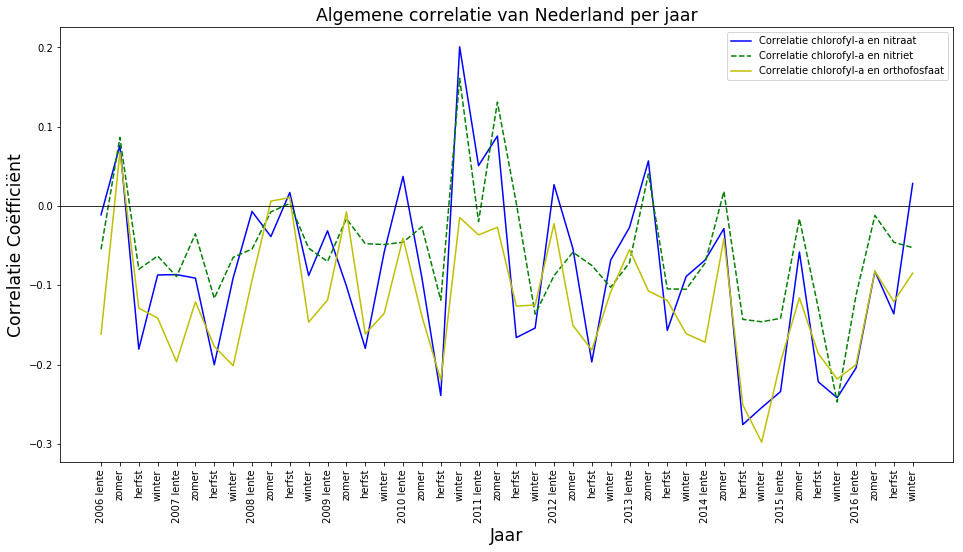

In [38]:
fig0, ax = plt.subplots(figsize=(16, 8))

ax.plot(algemene_correlatie_chlorofyl_a.jaar_seizoen, algemene_correlatie_chlorofyl_a.nitraat, 'b', label='Correlatie chlorofyl-a en nitraat')
ax.plot(algemene_correlatie_chlorofyl_a.jaar_seizoen, algemene_correlatie_chlorofyl_a.nitriet, 'g', linestyle='--', label='Correlatie chlorofyl-a en nitriet')
ax.plot(algemene_correlatie_chlorofyl_a.jaar_seizoen, algemene_correlatie_chlorofyl_a.orthofosfaat, 'y', label='Correlatie chlorofyl-a en orthofosfaat')

ax.set_title('Algemene correlatie van Nederland per jaar', size='xx-large')
ax.set_xlabel('Jaar', size='xx-large')
ax.set_ylabel('Correlatie Coëfficiënt', size='xx-large')
ax.legend(loc='best')
ax.set_xticklabels(algemene_correlatie_chlorofyl_a.xtick_label, rotation=90)
ax.axhline(color='k', linewidth=0.8);

## 2) Locatie Correlatie

### 2.1) Preprocessing

In [39]:
RWS_data_gefilterd_4params.head()

locatie      datum  chlorofyl-a  nitriet  nitraat  orthofosfaat  jaar  \
0   ALMLO 2010-01-18          3.0     0.02     1.69         0.018  2010   
1   ALMLO 2010-02-15          3.0     0.01     2.13         0.022  2010   
2   ALMLO 2010-03-15          3.0     0.03     1.97         0.043  2010   
3   ALMLO 2010-04-12          6.0     0.04     2.00         0.120  2010   
4   ALMLO 2010-05-10          3.0     0.04     1.69         0.220  2010   

  seizoen  
0  winter  
1  winter  
2   lente  
3   lente  
4   lente

In [134]:
#Filteren van rijen van de locatie
#Locaties: GOOIMMDN, WIELGN, AMRKHVN2
locatie = RWS_data_gefilterd_4params[RWS_data_gefilterd_4params['locatie'] == 'VLISSGBISSVH']

In [135]:
locatie

locatie      datum  chlorofyl-a  nitriet  nitraat  orthofosfaat  \
11950  VLISSGBISSVH 2006-01-09         1.42   0.0290    0.873        0.0680   
11951  VLISSGBISSVH 2006-01-11         1.62   0.0270    0.790        0.0590   
11952  VLISSGBISSVH 2006-02-06         1.60   0.0340    0.833        0.0540   
11953  VLISSGBISSVH 2006-02-09         1.38   0.0380    0.940        0.0580   
11954  VLISSGBISSVH 2006-03-08         2.82   0.0170    0.955        0.0750   
11955  VLISSGBISSVH 2006-03-09         3.04   0.0160    0.878        0.0460   
11956  VLISSGBISSVH 2006-04-05         9.34   0.0170    1.180        0.0430   
11957  VLISSGBISSVH 2006-04-06         7.86   0.0160    1.090        0.0380   
11958  VLISSGBISSVH 2006-05-01        17.20   0.0200    0.896        0.0230   
11959  VLISSGBISSVH 2006-05-02         7.70   0.0290    1.190        0.0390   
11960  VLISSGBISSVH 2006-05-17        38.20   0.0090    0.578        0.0080   
11961  VLISSGBISSVH 2006-05-29        14.80   0.0090    0.457        0.0210   
11962  VLISSGBISSVH 2006-06-01        11.20   0.0120    0.658        0.0310   
11963  VLISSGBISSVH 2006-06-13         9.64   0.0120    0.573        0.0240   
11964  VLISSGBISSVH 2006-06-28         6.48   0.0190    0.681        0.0420   
11965  VLISSGBISSVH 2006-07-10        11.80   0.0090    0.234        0.0240   
11967  VLISSGBISSVH 2006-07-25         8.74   0.0100    0.382        0.0480   
11968  VLISSGBISSVH 2006-08-09         8.06   0.0090    0.202        0.0450   
11969  VLISSGBISSVH 2006-08-21         6.64   0.0170    0.260        0.0500   
11970  VLISSGBISSVH 2006-08-22         4.26   0.0270    0.408        0.0690   
11971  VLISSGBISSVH 2006-09-04         0.18   0.0270    0.364        0.0630   
11972  VLISSGBISSVH 2006-09-19         3.38   0.0170    0.413        0.0610   
11973  VLISSGBISSVH 2006-09-20         3.50   0.0180    0.423        0.0620   
11974  VLISSGBISSVH 2006-10-03         4.26   0.0300    0.436        0.0620   
11975  VLISSGBISSVH 2006-10-17         2.88   0.0330    0.452        0.0620   
11976  VLISSGBISSVH 2006-11-14         1.32   0.0110    0.326        0.0460   
11977  VLISSGBISSVH 2006-11-15         1.36   0.0110    0.644        0.0760   
11978  VLISSGBISSVH 2006-12-12         1.24   0.0110    0.860        0.0740   
11979  VLISSGBISSVH 2006-12-13         1.72   0.0120    0.812        0.0720   
11980  VLISSGBISSVH 2007-01-10         1.12   0.0190    1.440        0.0780   
11981  VLISSGBISSVH 2007-02-07         1.64   0.0280    1.370        0.0930   
11982  VLISSGBISSVH 2007-03-05         1.80   0.0280    1.950        0.0810   
11983  VLISSGBISSVH 2007-04-02         3.98   0.0190    1.910        0.0700   
11984  VLISSGBISSVH 2007-05-02        15.00   0.0040    0.309        0.0090   
11985  VLISSGBISSVH 2007-05-14         6.92   0.0070    0.263        0.0200   
11986  VLISSGBISSVH 2007-05-30        15.20   0.0160    0.476        0.0240   
11987  VLISSGBISSVH 2007-06-12         4.94   0.0110    0.241        0.0250   
11988  VLISSGBISSVH 2007-06-27         3.74   0.0180    0.341        0.0420   
11989  VLISSGBISSVH 2007-07-11         5.98   0.0270    0.444        0.0520   
11990  VLISSGBISSVH 2007-07-25        11.80   0.0200    0.368        0.0430   
11991  VLISSGBISSVH 2007-08-07        20.60   0.0110    0.273        0.0330   
11992  VLISSGBISSVH 2007-08-21        18.20   0.0110    0.468        0.0520   
11993  VLISSGBISSVH 2007-09-04         3.04   0.0130    0.290        0.0440   
11994  VLISSGBISSVH 2007-09-18         3.74   0.0190    0.523        0.0620   
11995  VLISSGBISSVH 2007-10-02         4.24   0.0170    0.417        0.0570   
11996  VLISSGBISSVH 2007-10-16         2.32   0.0130    0.648        0.0750   
11997  VLISSGBISSVH 2007-11-15         1.68   0.0160    0.684        0.0660   
11998  VLISSGBISSVH 2007-12-11         1.00   0.0280    1.280        0.0880   
11999  VLISSGBISSVH 2008-01-07         4.34   0.0070    0.932        0.0640   
12000  VLISSGBISSVH 2008-02-06         1.64   0.0210    1.140 

In [114]:
locatie.shape

(283, 8)

In [136]:
locatie_correlatie = locatie.groupby(['jaar','seizoen']).corr()

In [137]:
locatie_correlatie

chlorofyl-a   nitraat   nitriet  orthofosfaat
jaar seizoen                                                            
2006 herfst  chlorofyl-a      1.000000  0.036959  0.290971     -0.005946
             nitraat          0.036959  1.000000 -0.199197      0.875798
             nitriet          0.290971 -0.199197  1.000000      0.063907
             orthofosfaat    -0.005946  0.875798  0.063907      1.000000
     lente   chlorofyl-a      1.000000 -0.593785 -0.495418     -0.820076
             nitraat         -0.593785  1.000000  0.792668      0.550027
             nitriet         -0.495418  0.792668  1.000000      0.368650
             orthofosfaat    -0.820076  0.550027  0.368650      1.000000
     winter  chlorofyl-a      1.000000 -0.682457  0.004284     -0.274825
             nitraat         -0.682457  1.000000  0.449217     -0.083774
             nitriet          0.004284  0.449217  1.000000     -0.873179
             orthofosfaat    -0.274825 -0.083774 -0.873179      1.000000
     zomer   chlorofyl-a      1.000000  0.034322 -0.836660     -0.889460
             nitraat          0.034322  1.000000  0.242696     -0.221169
             nitriet         -0.836660  0.242696  1.000000      0.728856
             orthofosfaat    -0.889460 -0.221169  0.728856      1.000000
2007 herfst  chlorofyl-a      1.000000 -0.647951  0.498698     -0.441999
             nitraat         -0.647951  1.000000  0.115624      0.925080
             nitriet          0.498698  0.115624  1.000000      0.063490
             orthofosfaat    -0.441999  0.925080  0.063490      1.000000
     lente   chlorofyl-a      1.000000 -0.799656 -0.656127     -0.853091
             nitraat         -0.799656  1.000000  0.864365      0.984357
             nitriet         -0.656127  0.864365  1.000000      0.913108
             orthofosfaat    -0.853091  0.984357  0.913108      1.000000
     winter  chlorofyl-a      1.000000  0.246765  0.339422      0.628619
             nitraat          0.246765  1.000000 -0.827788     -0.598543
             nitriet          0.339422 -0.827788  1.000000      0.944911
             orthofosfaat     0.628619 -0.598543  0.944911      1.000000
     zomer   chlorofyl-a      1.000000  0.117857 -0.507926      0.100715
             nitraat          0.117857  1.000000  0.478008      0.980416
             nitriet         -0.507926  0.478008  1.000000      0.560059
             orthofosfaat     0.100715  0.980416  0.560059      1.000000
2008 herfst  chlorofyl-a      1.000000 -0.410970 -0.831727     -0.371824
             nitraat         -0.410970  1.000000  0.074843      0.931808
             nitriet         -0.831727  0.074843  1.000000      0.161593
             orthofosfaat    -0.371824  0.931808  0.161593      1.000000
     lente   chlorofyl-a      1.000000 -0.412698 -0.389605     -0.636896
             nitraat         -0.412698  1.000000  0.673517      0.789340
             nitriet         -0.389605  0.673517  1.000000      0.686765
             orthofosfaat    -0.636896  0.789340  0.686765      1.000000
     winter  chlorofyl-a      1.000000 -0.475758 -0.764408     -0.486702
             nitraat         -0.475758  1.000000  0.930096      0.422076
             nitriet         -0.764408  0.930096  1.000000      0.538010
             orthofosfaat    -0.486702  0.422076  0.538010      1.000000
     zomer   chlorofyl-a      1.000000  0.346008  0.274445      0.197052
             nitraat          0.346008  1.000000  0.889219      0.550112
             nitriet          0.274445  0.889219  1.000000      0.383176
             orthofosfaat     0.197052  0.550112  0.383176      1.000000
2009 herfst  chlorofyl-a      1.000000 -0.705228 -0.846675      0.846675
             nitraat         -0.705228  1.000000  0.974355     -0.974355
             nitriet         -0.846675  0.974355  1.000000     -1.000000
             orthofosfaat     0.846675 -0.974355 -1.000000      1.000000
     lente   chlorofyl-a      1.000000 -0.657969 -0.839303     -0.627416
            

In [139]:
#index omzetten naar kolommen
locatie_correlatie.reset_index(inplace=True)

#Hernoemen naam van een kolom
locatie_correlatie = locatie_correlatie.rename(columns={'level_2':'parameter'})

#Filteren van rijen met parameter chlorofyl-a
locatie_correlatie_chlorofyl_a = locatie_correlatie[locatie_correlatie.parameter == 'chlorofyl-a']

#Een nieuwe kolom (jaar_seizoen) maken van jaar kolom en seizoen kolom
locatie_correlatie_chlorofyl_a['seizoen'] = locatie_correlatie_chlorofyl_a['seizoen'].astype(str)
locatie_correlatie_chlorofyl_a['jaar'] = locatie_correlatie_chlorofyl_a['jaar'].astype(str)
locatie_correlatie_chlorofyl_a['jaar_seizoen'] = locatie_correlatie_chlorofyl_a['jaar'] + " " + locatie_correlatie_chlorofyl_a['seizoen']

#De type van kolom seizoen veranderen naar Category om de kolom te kunnen sorteren met custom volgorde van seizoenen
locatie_correlatie_chlorofyl_a['seizoen'] = pd.Categorical(locatie_correlatie_chlorofyl_a['seizoen'], 
                                                            ["lente", "zomer", "herfst", "winter"])
#Sorteren eerst op kolom jaar en daarna op kolom seizoen
locatie_correlatie_chlorofyl_a.sort_values(['jaar','seizoen'], inplace=True)

C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

### 2.1.2) Visualisatie

#### Kolom voor xtick label in visualisatie 

In [140]:
#De waarden in kolom jaar_seizoen formatteren in een nieuwe kolom voor betere tijdreeks visualisatie
locatie_correlatie_chlorofyl_a['xtick_label'] = locatie_correlatie_chlorofyl_a.jaar_seizoen

locatie_correlatie_chlorofyl_a.xtick_label.replace(to_replace='^.*zomer$', value='zomer', regex=True, inplace=True)
locatie_correlatie_chlorofyl_a.xtick_label.replace(to_replace='^.*herfst$', value='herfst', regex=True, inplace=True)
locatie_correlatie_chlorofyl_a.xtick_label.replace(to_replace='^.*winter$', value='winter', regex=True, inplace=True)

C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Andre\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#### Visualisatie

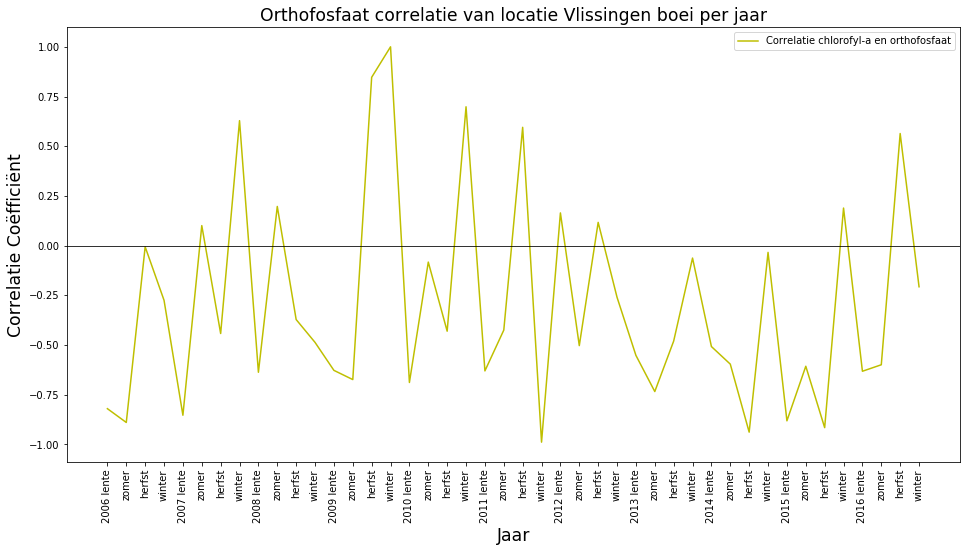

In [143]:
fig1, ax = plt.subplots(figsize=(16, 8))

#ax.plot(locatie_correlatie_chlorofyl_a.jaar_seizoen, locatie_correlatie_chlorofyl_a.nitraat, 'b', label='Correlatie chlorofyl-a en nitraat')
#ax.plot(locatie_correlatie_chlorofyl_a.jaar_seizoen, locatie_correlatie_chlorofyl_a.nitriet, 'g', linestyle='--', label='Correlatie chlorofyl-a en nitriet')
ax.plot(locatie_correlatie_chlorofyl_a.jaar_seizoen, locatie_correlatie_chlorofyl_a.orthofosfaat, 'y', label='Correlatie chlorofyl-a en orthofosfaat')

ax.set_title('Orthofosfaat correlatie van locatie Vlissingen boei per jaar', size='xx-large')
ax.set_xlabel('Jaar', size='xx-large')
ax.set_ylabel('Correlatie Coëfficiënt', size='xx-large')
ax.legend(loc='best')
ax.set_xticklabels(locatie_correlatie_chlorofyl_a.xtick_label, rotation=90)
ax.axhline(color='k', linewidth=0.8);

## 3) Visualisatie Outputs

#### Algemene correlatie

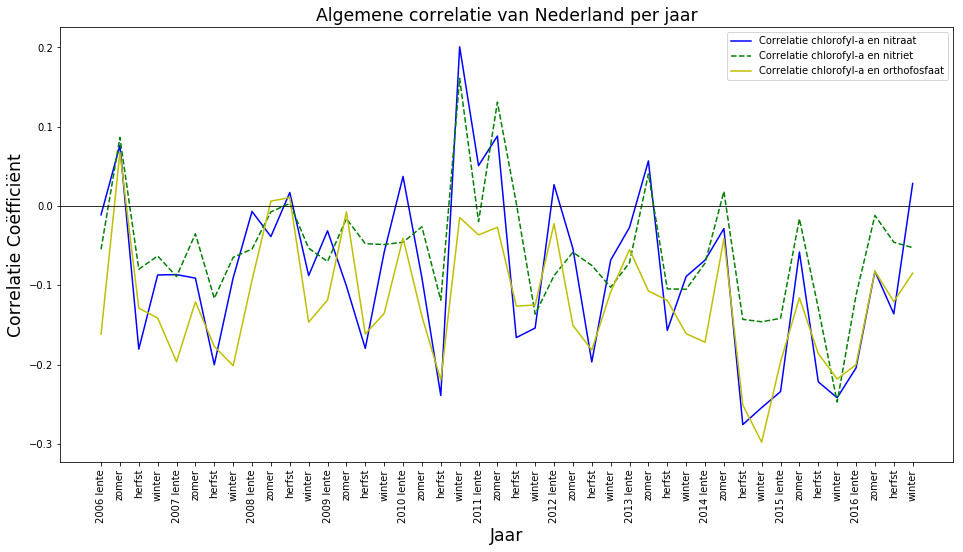

In [49]:
fig0

#### Locatie met correlatie met orthofosfaat

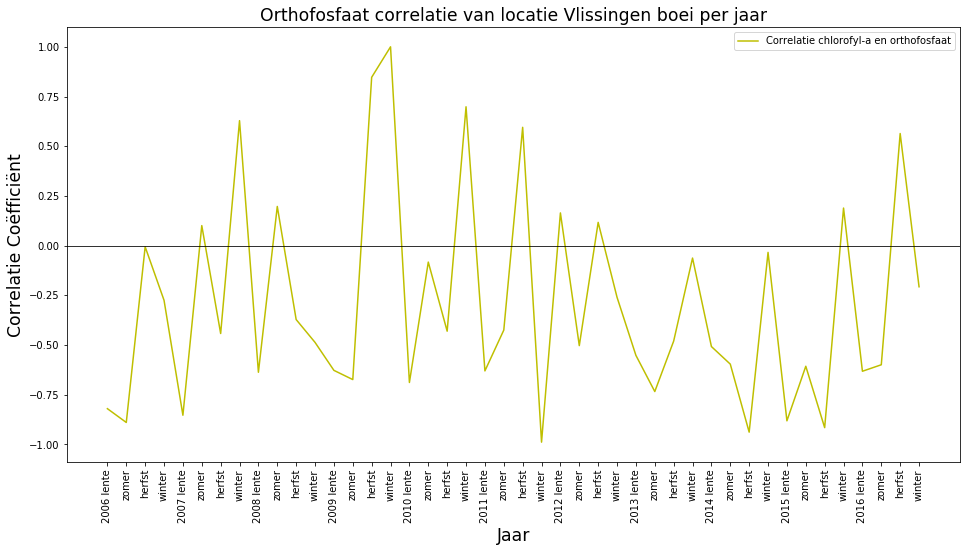

In [145]:
fig1

#### Locatie met correlatie met nitraat

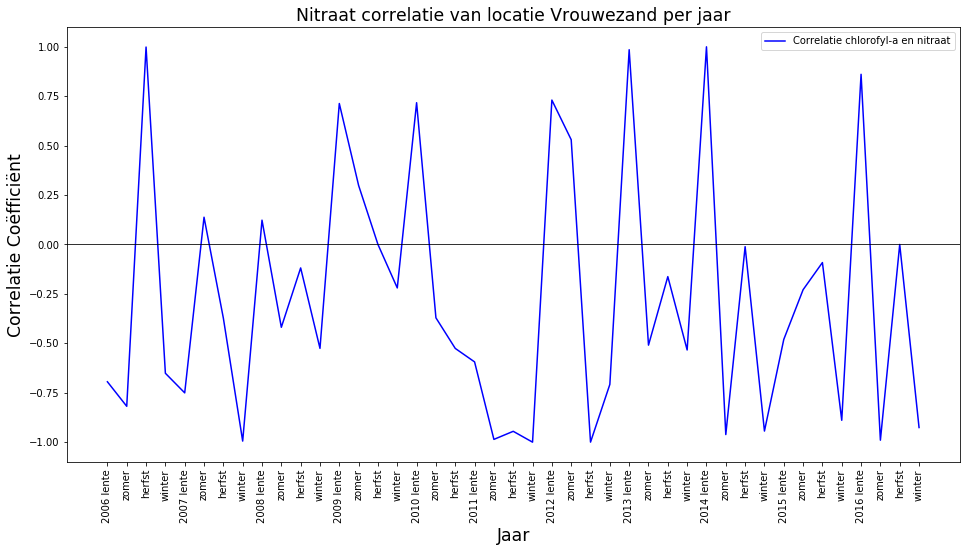

In [109]:
fig2

In [144]:
#fig1.savefig('locatie_correlatie_orthofosfaat.png')

In [111]:
#fig2.savefig('locatie_grootste_correlatie_nitraat.png')

## 4) Notities

- Bij uitzonderlije locaties zijn niet over alle jaren (en seizoenen) metingen gedaan. Hierdoor is de correlatie die volgt uit de metingen van deze locaties ook niet correct

- Correlatie berekening gaat bij een locatie niet goed. Het moet uitgezocht worden